# À propos de ce livret


### But du livret
>Présentation des résultats et sauvegarde



### Notes sur le livret

## Préparation préalable

In [1]:
# Utilités
import os
import numpy as np
import pandas as pd

# Chargement des données
import scipy.io
import json

# Barre de progression
from tqdm.auto import trange
from tqdm import tqdm_notebook, notebook

# Présentation
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Présentation des résultats

In [2]:
## Seulement changer le fichier de base
params = {
    "dossier1": "exp",
    "dossier2": "/transport_Seattle",
    "fichier_base": "/seattle_50_50_FMNN_r10-nnmf_mm",
    "fichier_comparatif": "/fichier_comparatif.csv"
    }

## Tableau comparatif

In [3]:
## À continuer
dossier = params["dossier1"]
fichier = params["fichier_comparatif"]

fichier_comparatif = "{:}{:}".format(dossier, fichier)

tableau_comparatif = pd.read_csv(fichier_comparatif,
                                 header=None,
                                 usecols = [1,2,3,4,5,6],
                                 names=[
                                     "Model", "Hyperparametres",
                                     "Fichier", "RMSE", "MAPE", "Temps"
                                 ])
tableau_comparatif

,Model,Hyperparametres,Fichier,RMSE,MAPE,Temps
0,FMNN,rang: 10 | algorithme: nnmf_mm,/seattle_50_50_FMNN,33.0053,0.537619,14.8123 secs
1,FMNN,rang: 10 | algorithme: nnmf_mm,/seattle_50_50_FMNN,33.0053,0.537619,14.2482 secs


## Présentations graphiques

In [4]:
## Chargement des informations pour les graphiques
ligne = "L"
fichier_graph = "{:}{:}{:}_{:}".format(params["dossier1"], params["dossier2"], params["fichier_base"], ligne)

# Indiquer le nombre de séries
nombre_series = 4

## Charger dans un dictionnaire les informations
list_data = {}
for g in range(nombre_series):
    graph = "{:}{:}.json".format(fichier_graph, g + 1)
    with open(graph, 'r') as j:
        list_data[g] = json.load(j)
    list_data[g] = [np.array(list_data[g][0]), np.array(list_data[g][1])]


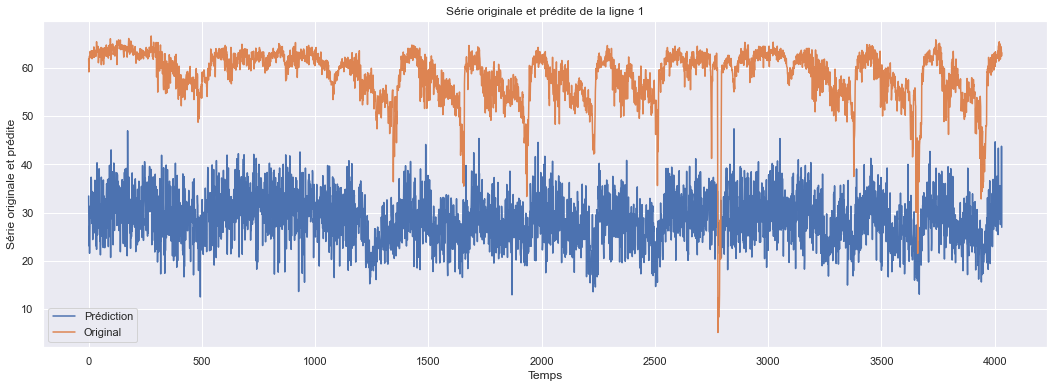

In [5]:
## Première ligne
fig = plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=list_data[0], dashes=False)
ax.set_xlabel('Temps')
ax.set_ylabel('Série originale et prédite')
ax.legend(['Prédiction', 'Original'])
ax.set_title('Série originale et prédite de la ligne 1')

# Nom du fichier
graph1 = "{:}{:}.png".format(fichier_graph, 1)
ax.figure.savefig(graph1)

plt.show()

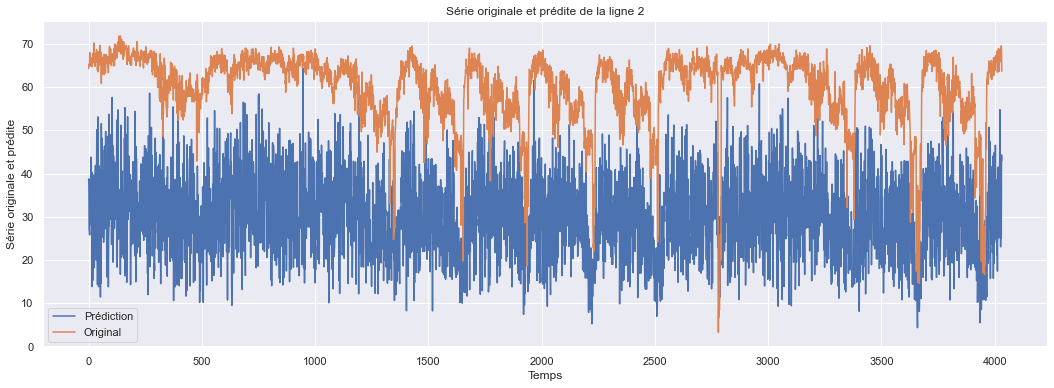

In [6]:
## Deuxième ligne
fig = plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=list_data[1], dashes=False)
ax.set_xlabel('Temps')
ax.set_ylabel('Série originale et prédite')
ax.legend(['Prédiction', 'Original'])
ax.set_title('Série originale et prédite de la ligne 2')

# Nom du fichier
graph2 = "{:}{:}.png".format(fichier_graph, 2)
ax.figure.savefig(graph2)

plt.show()

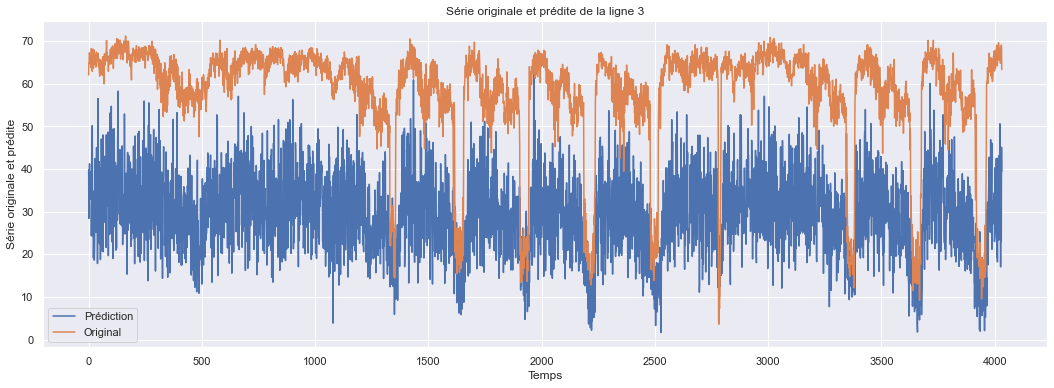

In [7]:
## Troisième ligne
fig = plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=list_data[2], dashes=False)
ax.set_xlabel('Temps')
ax.set_ylabel('Série originale et prédite')
ax.legend(['Prédiction', 'Original'])
ax.set_title('Série originale et prédite de la ligne 3')

# Nom du fichier
graph3 = "{:}{:}.png".format(fichier_graph, 3)
ax.figure.savefig(graph3)

plt.show()

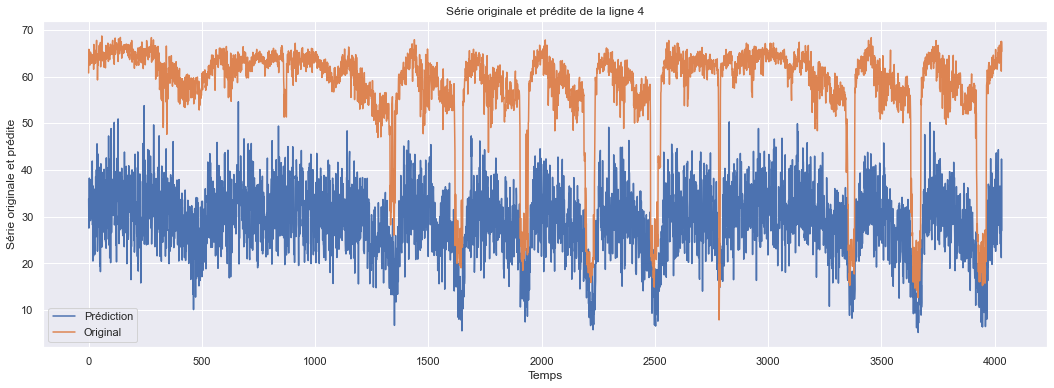

In [8]:
## Quatrième ligne
fig = plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=list_data[3], dashes=False)
ax.set_xlabel('Temps')
ax.set_ylabel('Série originale et prédite')
ax.legend(['Prédiction', 'Original'])
ax.set_title('Série originale et prédite de la ligne 4')

# Nom du fichier
graph4 = "{:}{:}.png".format(fichier_graph, 4)
ax.figure.savefig(graph4)


plt.show()

## Comparaison pred vs. original

Cette comparaison montre si les données sont plus ou moins proche de la donnée originale.


Source pour le paquet : https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [9]:
## Préparer les éléments pour le chargement / sauvegarde
nom_comparaison = "_comparaison"
mat_comparaison = "{:}{:}{:}{:}.mat".format(params["dossier1"],
                                            params["dossier2"],
                                            params["fichier_base"],
                                            nom_comparaison)
png_comparaison = "{:}{:}{:}{:}.png".format(params["dossier1"],
                                            params["dossier2"],
                                            params["fichier_base"],
                                            nom_comparaison)

In [10]:
## Chargement des données
df_comparaisons = scipy.io.loadmat(mat_comparaison)["index_comparaison"]
df_comparaisons = pd.DataFrame(df_comparaisons, columns = ['x_pred', 'y_original', 'dist_axe', "size"])

Pour ce graphique:
- Plus le cercle est foncé, plus la distance entre la prédiction et la donnée originale (en valeur absolue) est grande.

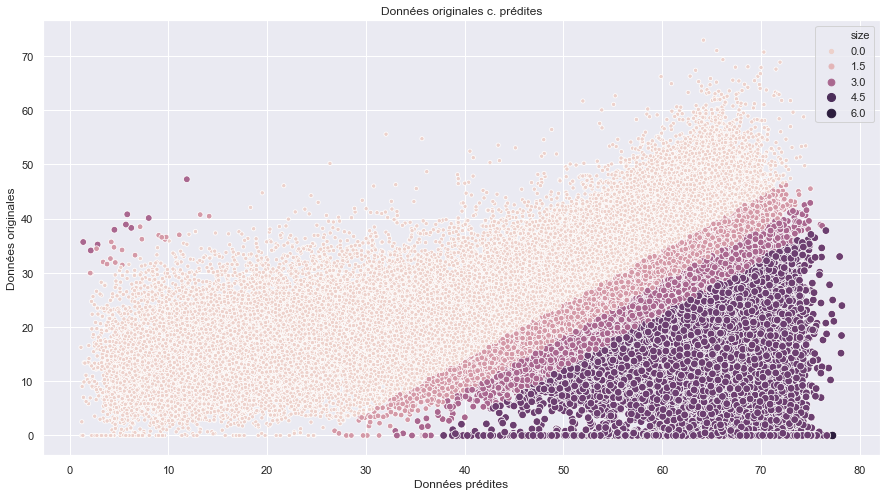

In [11]:
## Présentation du graphique
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="x_pred",
                     y="y_original",
                     hue="size",
                     size="size",
                     data=df_comparaisons)

ax.set(xlabel='Données prédites', ylabel='Données originales', title = "Données originales c. prédites")
ax.figure.savefig(png_comparaison)
plt.show()